In [69]:
import pandas as pd
import numpy as np
import os

#loading the dataset
file_path = r"D:/ML/laptop_price.csv"
df= pd.read_csv(file_path)
df





,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [4]:
df.isnull().sum()


Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [5]:
df.duplicated().sum()


0

In [6]:
df['Brand'].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [7]:
df.shape


(1000, 7)

D:\Users\MUIZZ KHAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


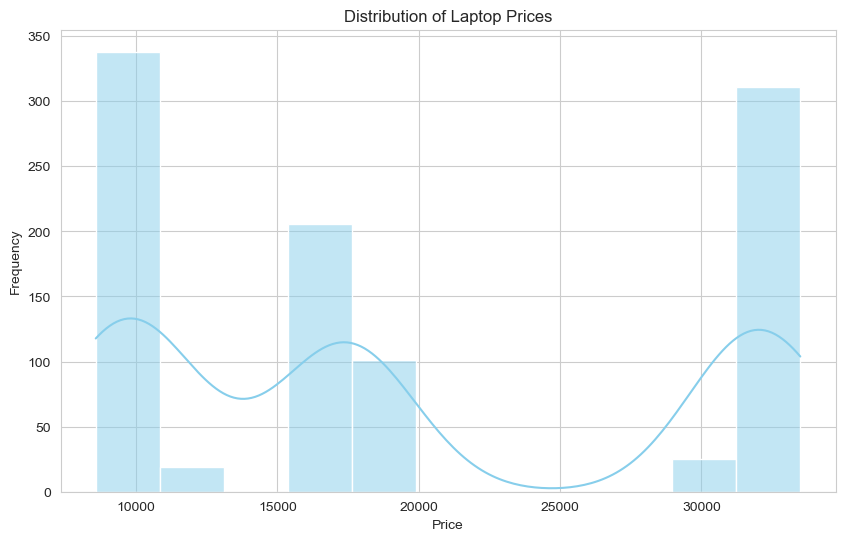

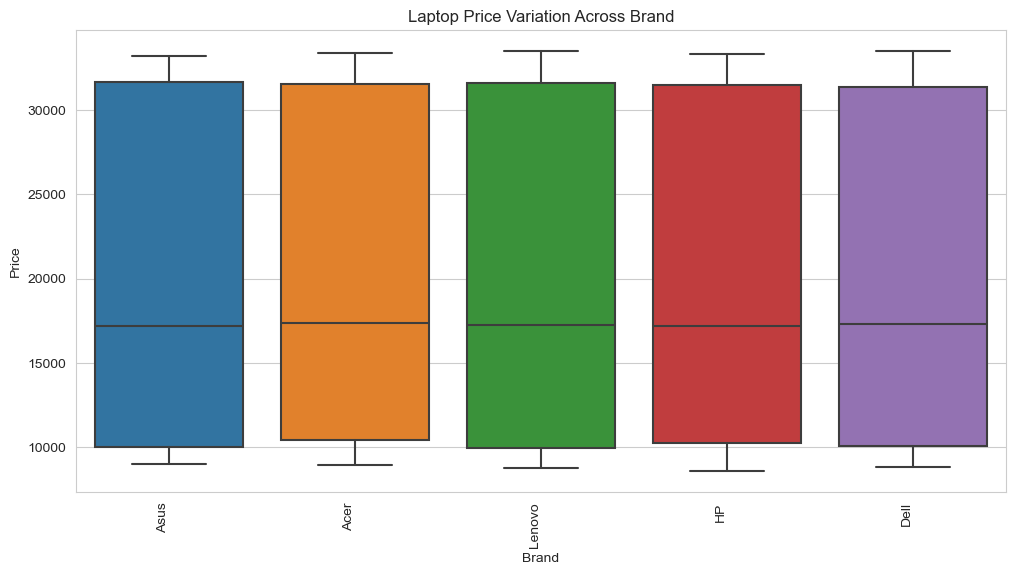

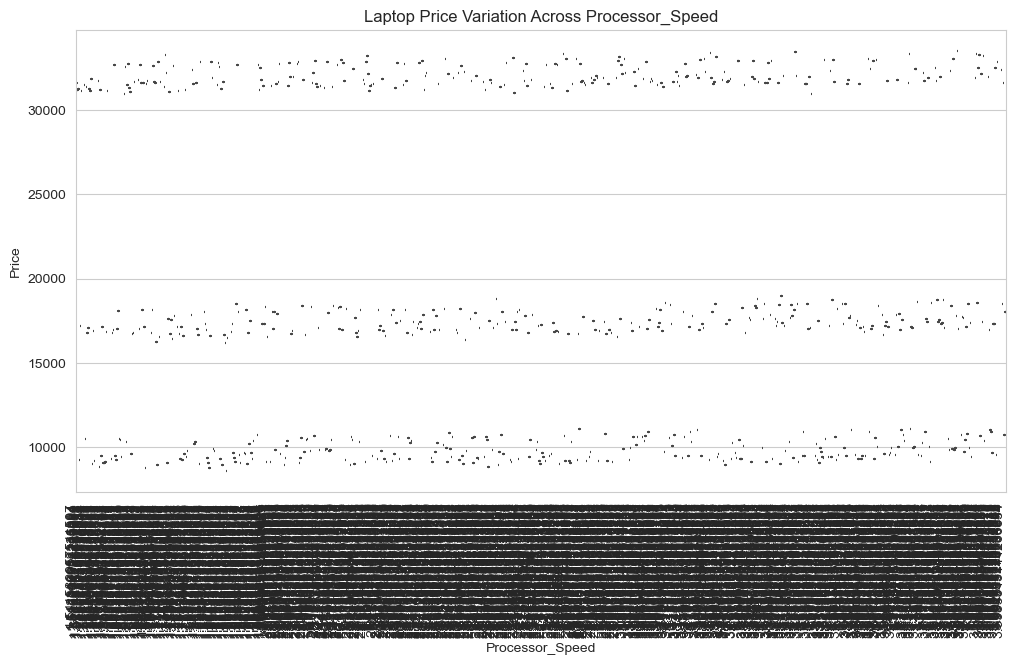

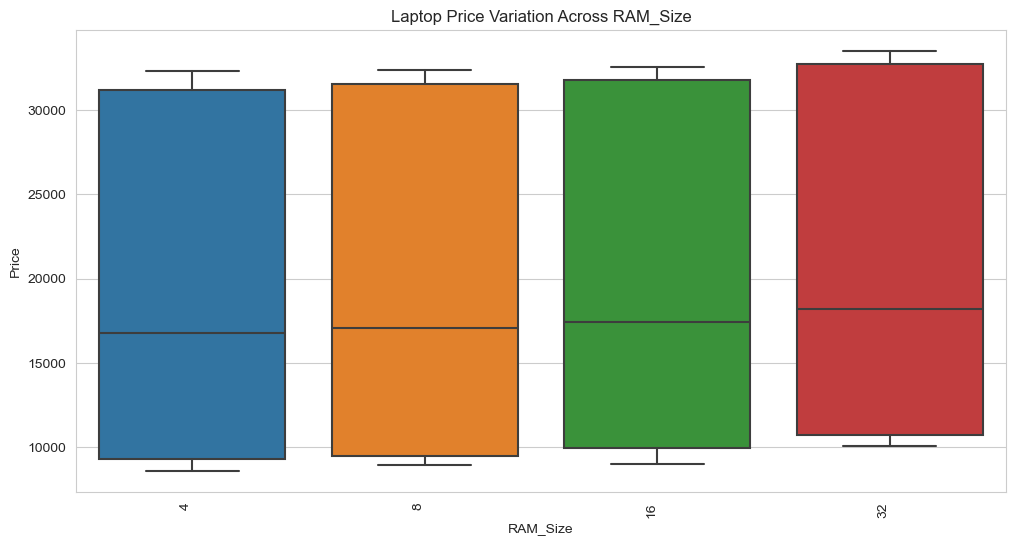

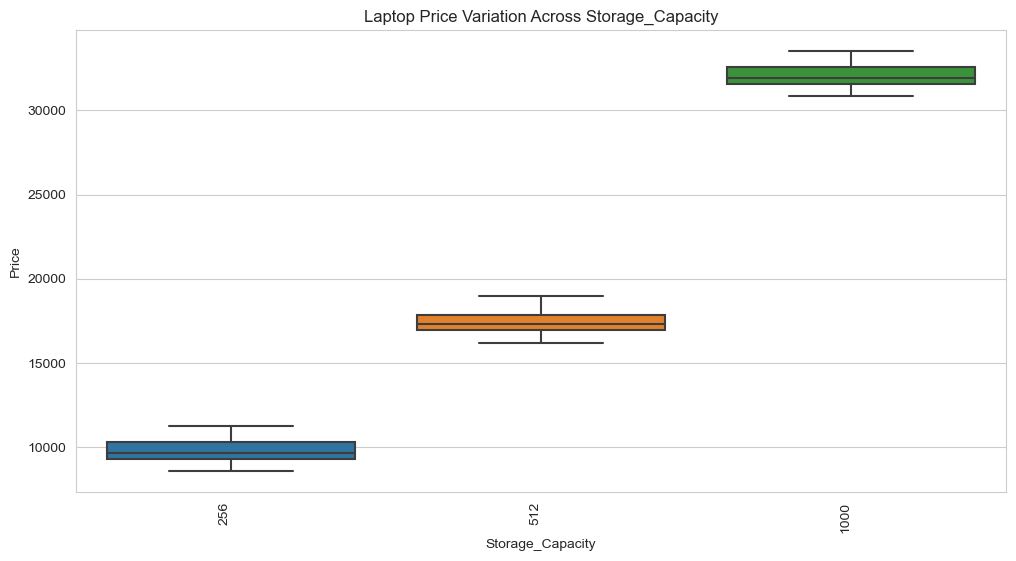

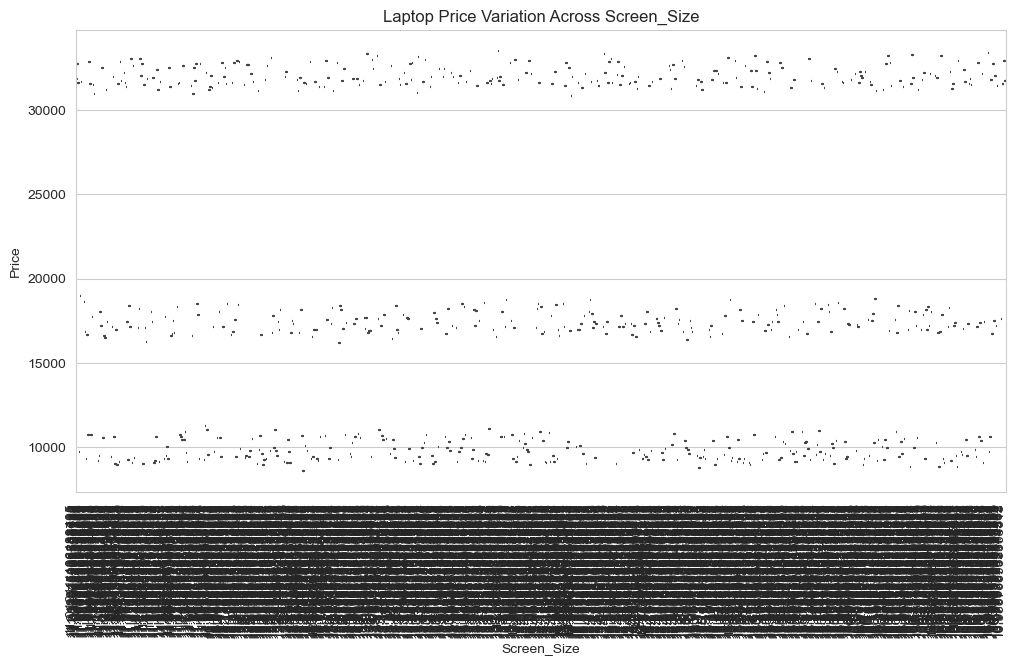

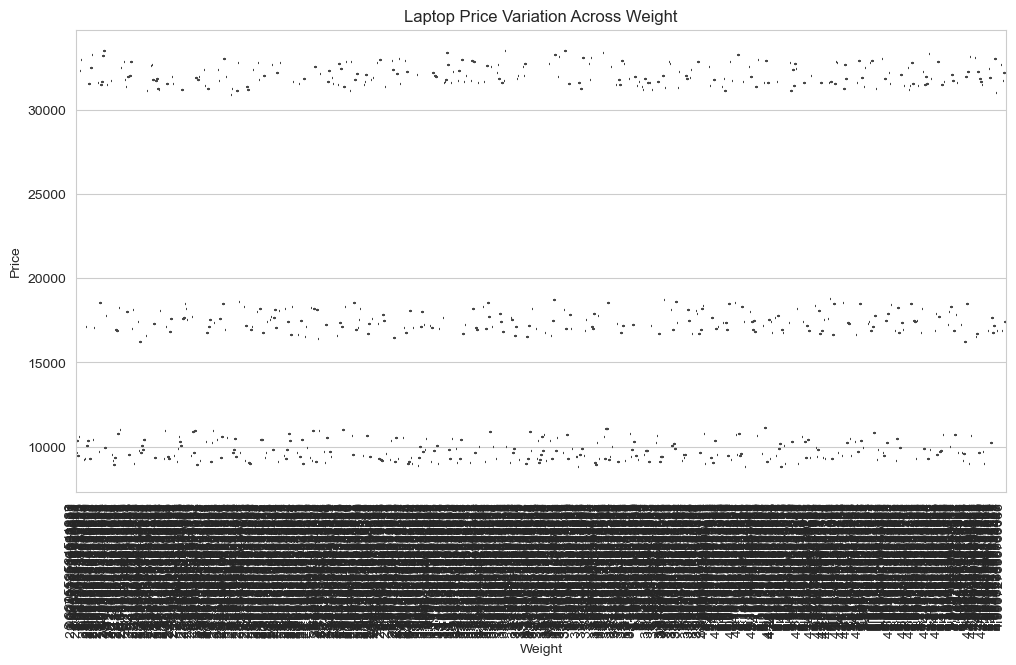

In [11]:
#visual representation
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn is a Python data visualization library based on Matplotlib

# Set style for seaborn plots
sns.set_style("whitegrid")

# Distribution of laptop prices (histogram or kernel density plot)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Explore how prices vary across different categories (box plots)
categories = ['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']

for category in categories:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category, y='Price', data=df)
    plt.title(f'Laptop Price Variation Across {category}')
    plt.xlabel(category)
    plt.ylabel('Price')
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['Price'],axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler


trf = ColumnTransformer([ ('ohe',OneHotEncoder(),['Brand'])],remainder = 'passthrough')


In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_trf)
X_test_scaled = scaler.transform(X_test_trf)


In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

y_pred = lr.predict(X_test_scaled)


In [22]:
r2_score(y_test,y_pred)


0.9995787727637543

In [23]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(lr,X_train_scaled,y_train,cv = 10))


0.9995233689518779

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
file_path = r"D:\ML\Laptop_price.csv"
df = pd.read_csv(file_path)

# Data preprocessing
# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cross_val_score_mean = np.mean(cross_val_score(model, X_train, y_train, cv=10))



evaluation_metrics = {
    "R2 Score": r2,
    "Mean Absolute Error": mae,
    "Mean Squared Error": mse,
    "Cross Validation Score": cross_val_score_mean
}

print(evaluation_metrics)

# Function to predict price based on user input
def predict_price(user_input):
    # Convert user input to dataframe
    user_df = pd.DataFrame([user_input])
    # Convert categorical columns to dummy variables and align with training data
    user_df = pd.get_dummies(user_df)
    user_df = user_df.reindex(columns=X.columns, fill_value=0)
    # Predict price
    predicted_price = model.predict(user_df)
    return predicted_price[0]
    

# Example user input
user_input = {
    'Brand': 'Lenovo',
    'Processor_Speed': 3.01,
    'RAM_Size': 4,
    'Storage_Capacity': 256,
    'Weight': 2.94,
    'Screen_Size': 15.58
    
    # Include all other necessary features
}

predicted_price = predict_price(user_input)
print(f'Predicted Price: {predicted_price}')



{'R2 Score': 0.9996442074396727, 'Mean Absolute Error': 146.22493703699624, 'Mean Squared Error': 32304.737335988408, 'Cross Validation Score': 0.9995104564880574}
Predicted Price: 9246.265795710633


In [66]:
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    accurate_predictions = np.abs((y_true - y_pred) / y_true) < tolerance
    accuracy = np.mean(accurate_predictions)
    return accuracy

accuracy = regression_accuracy(y_test, y_pred)
evaluation_metrics = {
"Accuracy": accuracy
}
print(evaluation_metrics)


{'Accuracy': 1.0}
